## ARIMA model
- ```ARIMA``` : Auto-Regressive Integrated Moving Average
- Time Series should be stationary
- can't be used for non-stationary Time Series, then need to convert non-Stationary Time Series to Stationary Time Series first
- ```Stationary Time Series```
    - Mean is same throughout the time Series
    - Methods to convert non-Stationary Time Series into a Stationary Time Series
        1. Differencing - find pair-wise absolute difference
                - 5 8 6 9 3 7
                -  3 2 3 6 4    - first level of differencing
                -   1 1 3 2     - second level of differencing
                -

        2. Box-Cox Method - raise the values with a particular power of lambda
- Checks to be done
    1. Stationarity
    2. p PACF
    3. q ACF
    4. d difference


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# CDAC_DataBook.xlsx

import os
os.chdir(r'C:\Users\surya\Downloads')
os.getcwd()

'C:\\Users\\surya\\Downloads'

In [ ]:
df = pd.read_excel('CDAC_DataBook.xlsx', sheet_name='birth')

<Axes: >

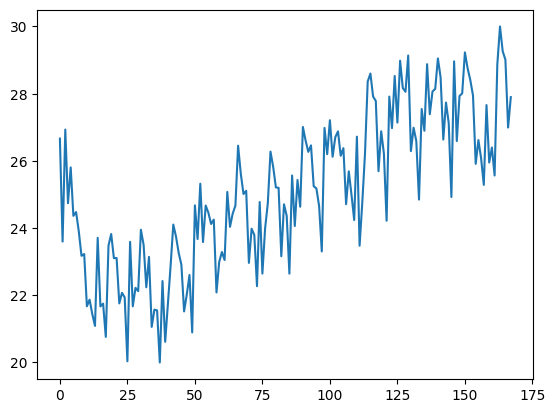

In [ ]:
df['BirthRate'].plot()

In [ ]:
df_train = df.iloc[:144]

In [ ]:
df_test = df.iloc[144:]

### AD Fuller Test
- ```Hₒ``` : the Time Series is NOT stationary
- ```Hᴀ``` : TIme Series is Stationary

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df_train)
# returns (TestStatistic, P-Value, lags, n_obs, critical values, res_store)
# here P-Value 0.972 > 0.05, so Hₒ is not rejected

(0.201716047916316,
 0.972357677757101,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 322.55907506392055)

In [ ]:
adfuller(df_train.diff().dropna())
# returns (TestStatistic, P-Value, lags, n_obs, critical values, res_store)
# here P-Value 0.0005 < 0.05, so Hₒ is rejected
# As per Hᴀ, this has now become a Stationary Time Series

(-4.2539049188587,
 0.000533337897888096,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 314.6470672927586)

In [ ]:
# adfuller(df_train.diff().diff().dropna())
# second level of differencing

- Three parameters along with  Time series
    - p
    - q
    - d
        - difference
    -


### Lag
1. Yt
    - Actual values (```0th Lag```)
2. Yt+1
    - 1st Lag
3. Yt+2
    - 2nd Lag
- ```Yt``` and ```Yt+1``` have direct relation
- ```Yt+1``` and ```Yt+2``` have direct relation
- ```Yt``` and ```Yt+2``` have indirect relation


### ACF & PACF
- ```ACF``` (```Auto-Correlation Factor Graph```)
    - both direct and indirect relationship
    - value of ```q```
- ```PACF``` Partial Auto-Correlation Factor Graph
    - direct relationship
    - value of ```p```


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

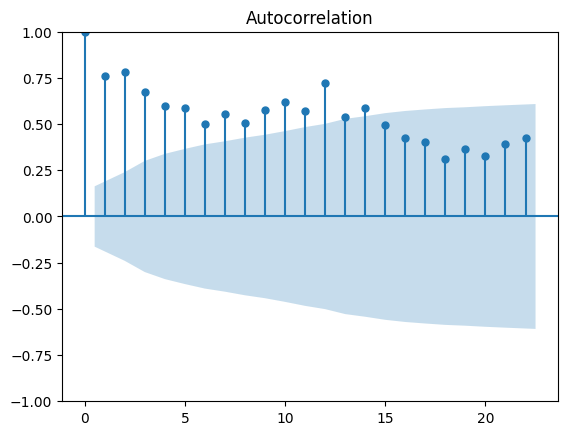

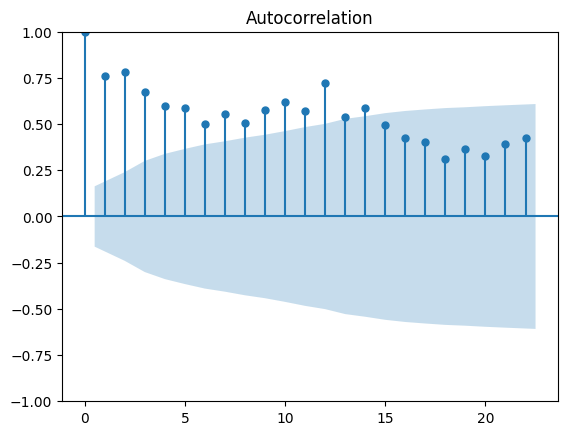

In [ ]:
plot_acf(df_train)

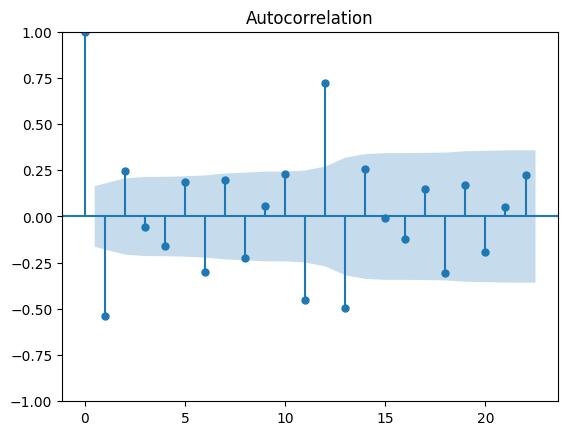

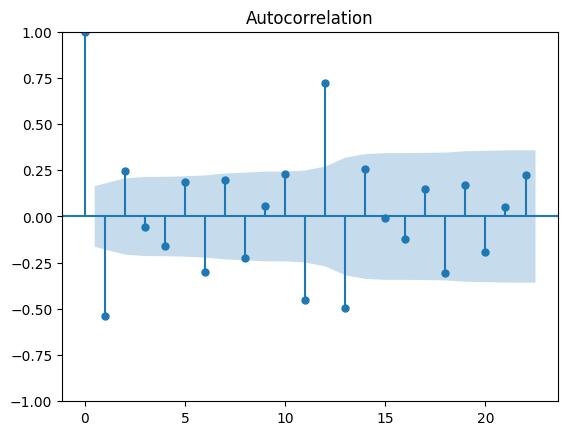

In [ ]:
plot_acf(df_train.diff().dropna())
# for 0th month lafg is always 1
# if value is in blue zone, it is critical value, cannot ignore it
# similarly, values otside blue zone, are non-critical values, we can ignore it

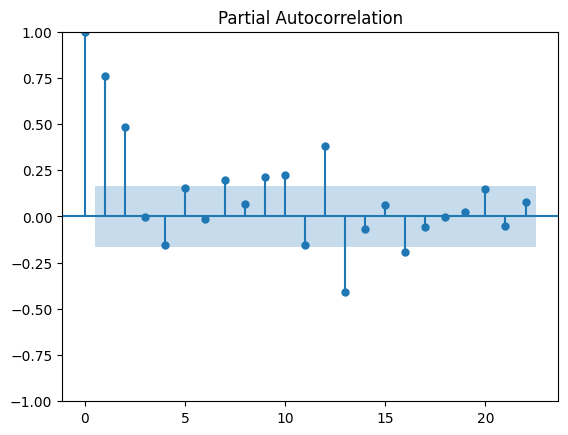

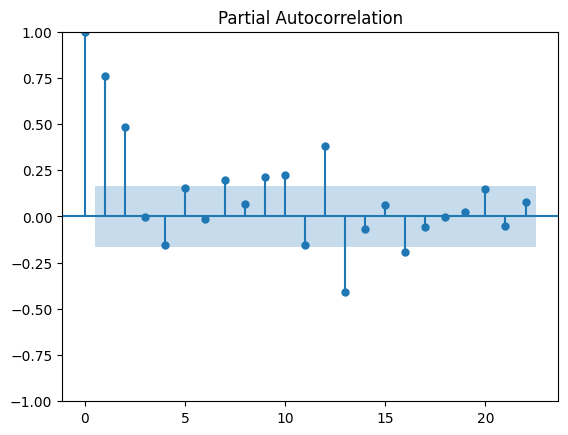

In [ ]:
plot_pacf(df_train)

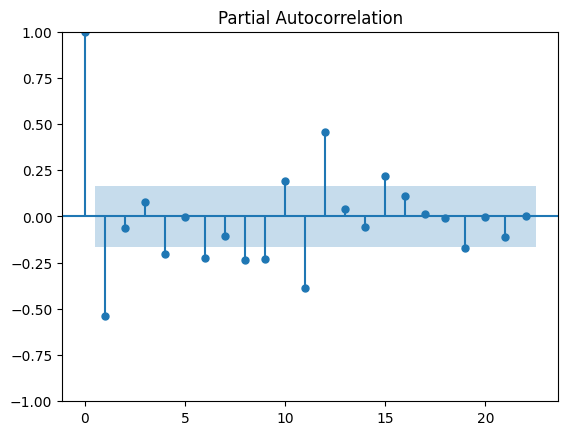

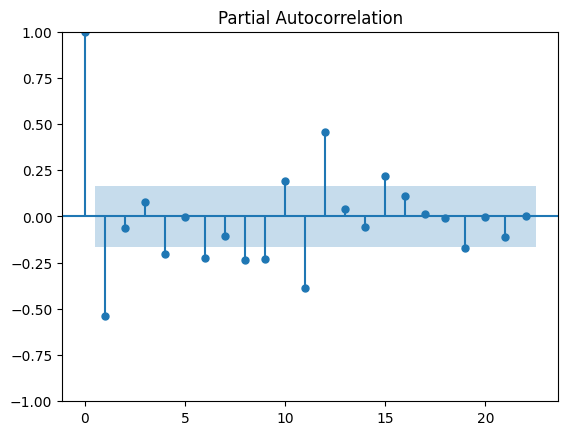

In [ ]:
plot_pacf(df_train.diff().dropna())

- p=1 (PACF plot)
- d=1(level of differencing)
- q=2(ACF plot)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
mod1 = ARIMA(df_train, order=(1, 1, 2)).fit()
# mod1 = ARIMA(df_train, order=p, d, q).fit()

In [ ]:
pred = mod1.forecast(len(df_test))

In [ ]:
y_hat_avg = df_test.copy()

In [ ]:
y_hat_avg["ARIMA"] = pred

In [ ]:
rms_arima = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['ARIMA']))
rms_arima

1.424648538452713

# Scaling
1. Normalization Scaler
    - using Min-Max Scaler
    - sensitive to outliers
    - for non-normal data
    - all values between 0 and 1
        - ```X'``` = (```X - Xmin```) / (```Xmax - Xmin```)
        - min = 20
        - max = 50
        - X = 40
        - X' = (40-20) / (50-20)
        - X' = 20/30
        - X' = 0.66
2. Robust Scaler
    - uses IQR
    - robust to outliers
    - ```X'``` = (```X-Q1```) / (```Q3-Q1```)
3. Standardization
    - All X' values would have a mean of 0 and S.D of 1
    - Less sensitive to presence of outliers
    - ```X'``` = (```X - Mu```) / ```S.D.```


# PCA (Principal Component Analysis)
- Dimension Reduction Rule
- if ```n``` ```number of variables```, then you can make at most ```n``` ```number of components``` only
- each Principal Component can give you certain amount/percentage of variation in the data
- first Principal Component explains most percentage of the variation, say 60% variation
- second Principal Component explains 2nd most percentage of variation, say 35% variation
- as you add more Principal Components, the additional value that each Principal Component is adding goes on reducing

## import libs

In [ ]:
import pandas as pd

## import dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# CDAC_DataBook.xlsx

import os
os.chdir(r'C:\Users\surya\Downloads')
os.getcwd()

In [ ]:
df = pd.read_excel("CDAC_DataBook.xlsx", sheet_name='iris')

## random sampling

In [ ]:
df = df.sample(frac=1)
# to randomize the rows so that they are not in a specific order

In [ ]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
98,5.1,2.5,3.0,1.1,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor


## X & Y

In [ ]:
x = df.drop('Species', axis=1) #predictors

In [ ]:
y = df['Species'] # response

## splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train[:2]

,Sepal_length,Sepal_width,Petal_length,Petal_width
39,5.1,3.4,1.5,0.2
48,5.3,3.7,1.5,0.2


## Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit_transform(x_test)

In [ ]:
# x_train[:5]

## import PCA

In [ ]:
from sklearn.decomposition import PCA

## For n_components=2

### Modeling (n_components=2)

In [ ]:
myinst = PCA(n_components=2)
# create an instance

### Training (n_components=2)

In [ ]:
x_train = myinst.fit_transform(x_train)
x_test = myinst.transform(x_test)

### explained_variance_ratio_ (n_components=2)

In [ ]:
myinst.explained_variance_ratio_
# It means remaining two components will explain only 5% variation in input data

array([0.92721773, 0.05056105])

In [ ]:
0.92105056 + 0.05507036
#it explins 97% of of variation

0.97612092

## For n_components=3

### splitting  (n_components=3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

 ### Modeling (n_components=3)

In [ ]:
myinst3 = PCA(n_components=3)
# create an instance

### Training (n_components=3)

In [ ]:
x_train = myinst3.fit_transform(x_train)
x_test = myinst3.transform(x_test)

### explained_variance_ratio_ (n_components=2)

In [ ]:
myinst3.explained_variance_ratio_
# It means remaining two components will explain only 5% variation in input data

array([0.92529586, 0.05400327, 0.01591176])

In [ ]:
0.92136477 + 0.05608165 + 0.01775618
# it explains 99.5% of of variation

0.9952026